In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [8]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [14]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(2443651, 9)

In [20]:
# Displaying the data types of each column in the dataframe
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [23]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes))

[dtype('float64'), dtype('O'), dtype('int64'), dtype('bool')]

In [32]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes('number').columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [39]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes('number').nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [51]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [56]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [62]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

 1.Generate a frequency table for the product category.

In [100]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [109]:
# 2. Which are the top 5 most listed product categories?
top_5_categories = frequency_table.nlargest(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.


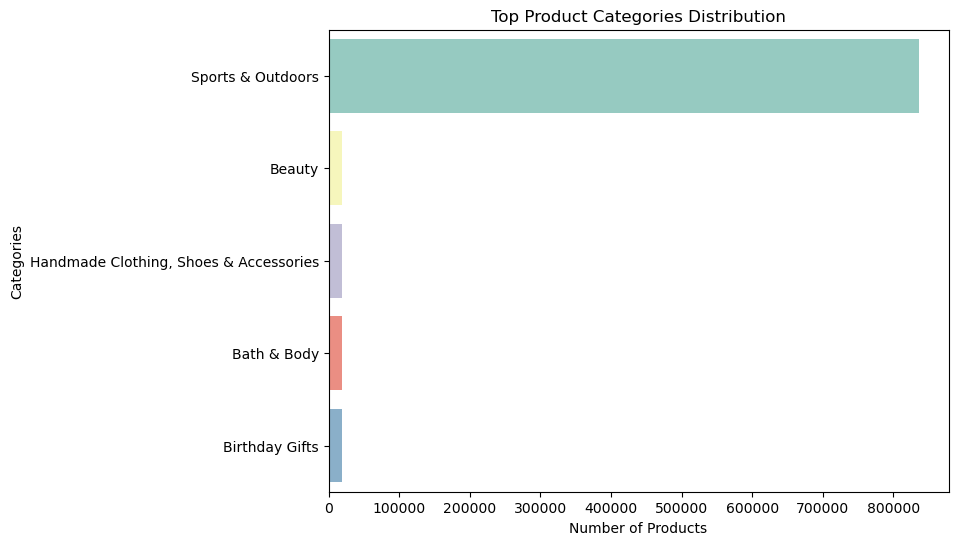

In [122]:
plt.figure(figsize=(8, 6))
sns.barplot(y= top_5_categories.index, x=top_5_categories.values, palette="Set3")

plt.ylabel('Categories')
plt.xlabel('Number of Products')
plt.title('Top Product Categories Distribution')
plt.show()

For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: ylabel='count'>

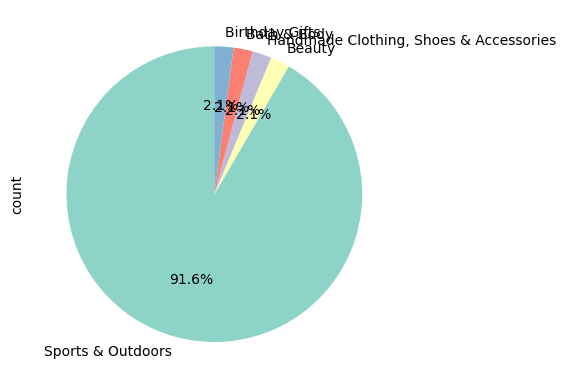

In [133]:
top_5_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.

In [146]:
mean_price = df['price'].mean()
mean_price

89.24380943923663

In [148]:
median_price=df['price'].median()
median_price

19.09

In [150]:
mode_price = df['price'].mode()[0]
mode_price

9.99

In [156]:
#2.What's the average price point of products listed? How does this compare with the most common price point (mode)?
# Display the results
print(f"Average Price (Mean): ${mean_price:.2f}")
print(f"Most Common Price (Mode): ${mode_price:.2f}")
# Compare mean and mode
if mean_price > mode_price:
    print(f"The average price point is higher than the most common price point by ${mean_price - mode_price:.2f}.")
elif mean_price < mode_price:
    print(f"The average price point is lower than the most common price point by ${mode_price - mean_price:.2f}.")
else:
    print("The average price point is equal to the most common price point.")

Average Price (Mean): $89.24
Most Common Price (Mode): $9.99
The average price point is higher than the most common price point by $79.25.


Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.

In [169]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [158]:
variance = df['price'].var()
variance

119445.48532256528

In [160]:
standard_deviation = df['price'].std()
standard_deviation

345.60886175352226

In [162]:
maximum = df['price'].max()
maximum

100000.0

In [164]:
minimum = df['price'].min()
minimum

0.0

In [166]:
range = maximum-minimum
range

100000.0

In [224]:
 #interquartile
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])   
quantiles_price
# Q1 = 9.99 ,Q2 = 19.09,Q3 = 45.99

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

How varied are the product prices? Are there any indicators of a significant spread in prices?

Dispersion:

The high variance and standard deviation suggest that there is significant spread in prices, indicating that prices can vary quite a bit from the average price point. This may imply that there are various factors affecting product prices, such as quality, brand, features, or market demand.

Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

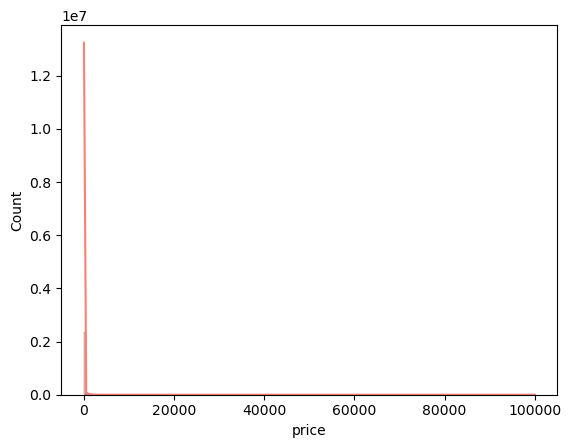

In [213]:
sns.histplot(df['price'], kde=True, bins=200, color="salmon")

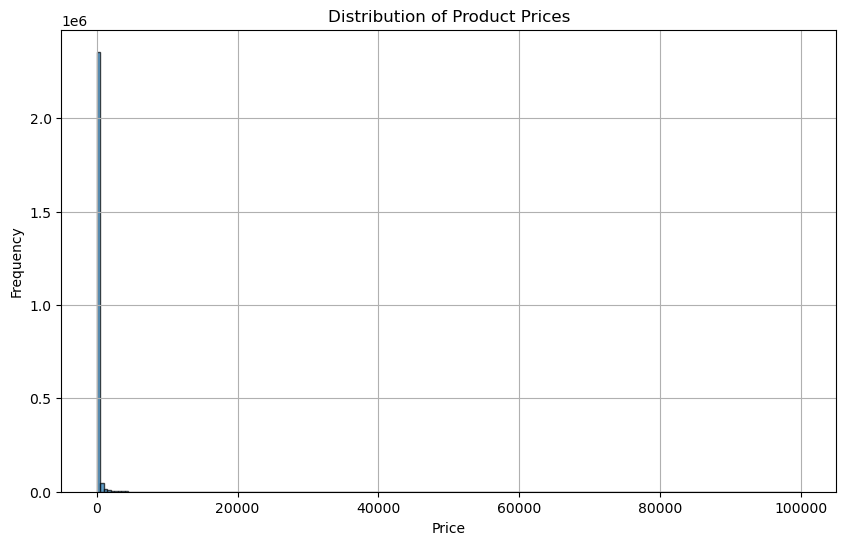

In [208]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=200, edgecolor='black', alpha=0.7)
# Customize the plot
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.grid(True)
plt.show()

Here are some reasons why the histogram might be difficult to read:

The x-axis doesn't show what the upper limit of the price range is.
The y-axis doesn't show the number of products on the scale.

<Axes: >

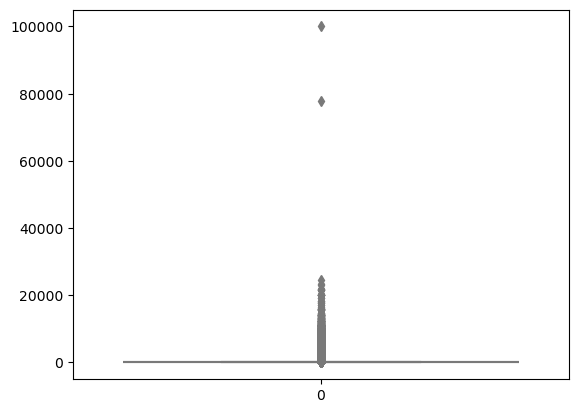

In [202]:
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential 
#outliers in product pricing.

sns.boxplot(data = df['price'], color="lightblue")

In [ ]:
Overall, the boxplot suggests that there is a range of product prices, and that there are some outliers – priced significantly higher or lower than the rest.

Lower_outlier_bound = 9.99 - 1.5 (45.99-9.99)
Upper_outlier_bound = 45.99 + 1.5 (45.99-9.99)
Lower_outlier_bound,Upper_outlier_bound

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.

In [240]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [237]:
mean_price = df['stars'].mean()
median_price = df['stars'].median()
mode_price = df['stars'].mode()[0]

mean_price, median_price, mode_price,df['stars']

(2.152836472966065,
 0.0,
 0.0,
 0          4.7
 1          4.7
 2          4.7
 3          4.7
 4          4.6
           ... 
 2443646    0.0
 2443647    0.0
 2443648    0.0
 2443649    4.3
 2443650    4.5
 Name: stars, Length: 2443651, dtype: float64)

# 2. How do customers generally rate products? Is there a common trend?
More than half of the customers are not rating the products. This is the trend.

Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.

In [244]:
variance_price = df['stars'].var()
std_dev_price = df['stars'].std()
min_price = df['stars'].min()
max_price = df['stars'].max()
range_price = max_price - min_price
quantiles_price = df['stars'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

Are the ratings consistent, or is there a wide variation in customer feedback?
There is a wide variation in customer feedback. The high variance and standard deviation, combined with a wide range and a significant number of low ratings, suggest that customer feedback is not consistent.

Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.

In [250]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

Are the ratings normally distributed, or do they lean towards higher or lower values?
They lean towards lower values.

Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

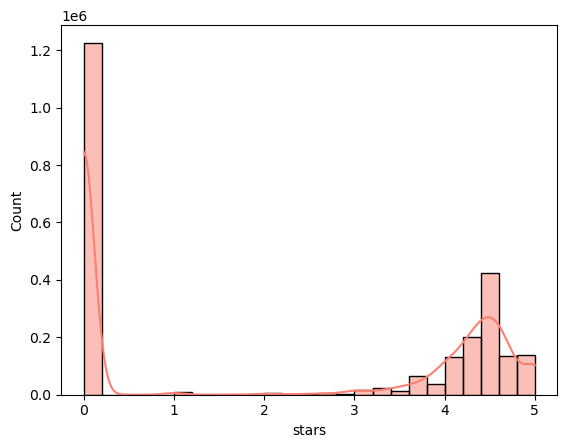

In [264]:
sns.histplot(df['stars'], kde=True, bins=25, color="salmon")

yes. The rating of 4 stars is the most common.